# Comparison of microscopic and macroscopic results in terms of the unified trajectory

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Loading the data into a plotting tool class.
micro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3o2/micro/'
macro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3o2/mean/'
selector = 'test=False & sample=0 & eps=0.05 & phi=0.3 & tau=1'
with pd.HDFStore(micro_path+'mean.h5') as store:
    mean = store.select('dat', 'approximate=1 & '+ selector)
with pd.HDFStore(micro_path+'std.h5') as store:
    sem = store.select('dat', 'approximate=1 & '+ selector)
with pd.HDFStore(macro_path+'mean.h5') as store:
    ma_mean = store.select('dat', 'approximate=2 & '+ selector)
with pd.HDFStore(macro_path+'std.h5') as store:
    ma_sem = store.select('dat', 'approximate=2 & '+ selector)

In [13]:
for i, df in enumerate([mean, sem, ma_mean, ma_sem]):
    
    columns = df.columns
    new_columns = pd.Index(['$'+col+'$' for col in columns.values], name=columns.name)
    df.columns = new_columns
    df.index = df.index.droplevel(['tau', 'phi', 'eps', 'approximate', 'test', 'sample'])

def plot_var(name, mean, sem, ax, color, style, legend=True):
    
    t = mean.index.values
    m = mean[name].values
    s = sem[name].values
    
    if legend is False:
        name = '__no_label__'
    ln = ax.plot(t, m, style, color=color, label=name)
    ax.fill_between(t, m+s, m-s, alpha=.2, color=color)
    
    return ln

def legend_surrogates(styles, pos, ax):
    
    lns = []
    
    for name, style  in styles.items():
        ln = ax.plot(pos[0], pos[1], style, color='k', alpha=.5, label=name)
        lns += ln
        
    return lns

In [14]:
mean.head()

,$c$,$g$,$mu_c^c$,$mu_c^d$,$mu_d^c$,$mu_d^d$,$time$,$x$,$y$,$z$,...,$i_c$,$k_c$,$k_d$,$l_c$,$l_d$,$n_c$,$r$,$r_c$,$r_d$,$w$
tstep,,,,,,,,,,,,,,,,,,,,,
0.0,1.000045,7.999999,0.500022,0.499997,0.499997,0.500022,0.0,-0.000400,0.008685,0.499642,...,0.499800,0.500012,0.500012,0.437112,0.562888,0.499800,0.006631,0.382356,0.656502,0.583169
4.0,3.064266,7.968571,1.269960,0.605507,0.589657,1.299408,4.0,-0.104358,-0.107438,0.406568,...,0.429153,0.904583,0.986535,0.449117,0.550883,0.447821,0.009215,0.308052,0.462641,0.827454
8.0,5.313622,7.925705,1.948875,0.850185,0.933574,2.125425,8.0,-0.214961,-0.210947,0.374384,...,0.374910,1.282951,1.663813,0.419553,0.580447,0.392520,0.012283,0.256339,0.365893,1.046082
12.0,7.460937,7.870420,2.580033,1.126096,1.433348,3.013283,12.0,-0.321477,-0.324958,0.355773,...,0.324521,1.621623,2.483041,0.386453,0.613547,0.339261,0.015427,0.221759,0.308012,1.242343
16.0,9.370691,7.802618,3.057063,1.401960,2.163997,3.938766,16.0,-0.375892,-0.373685,0.341650,...,0.300507,1.918372,3.395906,0.356377,0.643623,0.312054,0.018479,0.197346,0.269734,1.418138


[<matplotlib.lines.Line2D object at 0x7f91948beeb8>, <matplotlib.lines.Line2D object at 0x7f91948be358>, <matplotlib.lines.Line2D object at 0x7f91948be240>, <matplotlib.lines.Line2D object at 0x7f9194838668>]


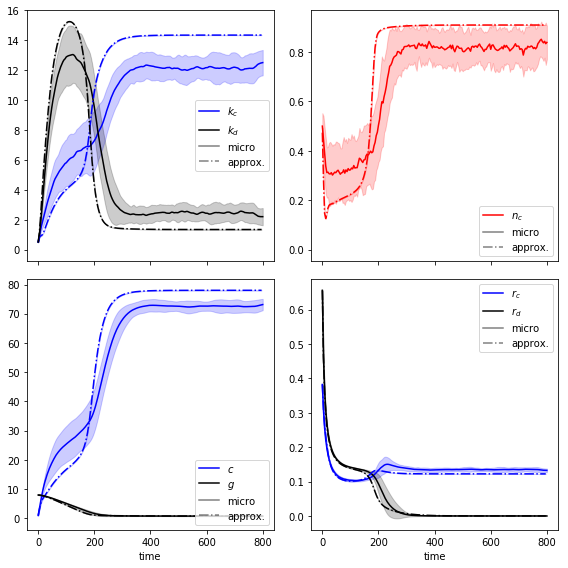

In [15]:
styles = {'micro': '-',
          'approx.': '-.'}

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
plot_var('$k_c$', mean, sem, ax1, 'b', '-')
plot_var('$k_d$', mean, sem, ax1, 'k', '-')

plot_var('$k_c$', ma_mean, ma_sem, ax1, 'b', '-.', legend=False)
plot_var('$k_d$', ma_mean, ma_sem, ax1, 'k', '-.', legend=False)

ax1.set_xticklabels([])
legend_surrogates(styles, [0, 0], ax1)
plt.legend()

ax2 = fig.add_subplot(222)
plot_var('$n_c$', mean, sem, ax2, 'r', '-')
plot_var('$n_c$', ma_mean, ma_sem, ax2, 'r', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax2)
ax2.set_xticklabels([])
plt.legend(loc='lower right')

ax3 = fig.add_subplot(223)
#ax3b = ax3.twinx()
plot_var('$c$', ma_mean, ma_sem, ax3, 'b', '-.', legend=False)
plot_var('$g$', ma_mean, ma_sem, ax3, 'k', '-.', legend=False)

ln1 = plot_var('$c$', mean, sem, ax3, 'b', '-')
ln2 = plot_var('$g$', mean, sem, ax3, 'k', '-')

lns = legend_surrogates(styles, [0, 0], ax3)

lns = ln1 + ln2 + lns
print(lns)
labs = [ln.get_label() for ln in lns]

plt.legend(lns, labs, loc='lower right')

ax3.set_xlabel('time')

ax4 = fig.add_subplot(224)
plot_var('$r_c$', mean, sem, ax4, 'b', '-')
plot_var('$r_d$', mean, sem, ax4, 'k', '-')

plot_var('$r_c$', ma_mean, ma_sem, ax4, 'b', '-.', legend=False)
plot_var('$r_d$', ma_mean, ma_sem, ax4, 'k', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax4)
plt.legend()
ax4.set_xlabel('time')

fig.tight_layout()
plt.savefig('micro_vs_approx.pdf')